In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

#Load dataset_NN.csv dataset. [1 points]

ship_data = pd.read_csv('dataset_NN.csv')
ship_data.head(10)

#adding filter to ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [15]:
#Pre-processing. [3 points]
#converting all values to numericals for better handling
encode = LabelEncoder()
encoded_set = ship_data[ship_data.columns[:]].apply(encode.fit_transform)

#replacing missing values in Age with NA

ship_data.fillna(np.mean)[:1]
ship_data.Age.fillna("NA")

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888      NA
889    26.0
890    32.0
Name: Age, Length: 891, dtype: object

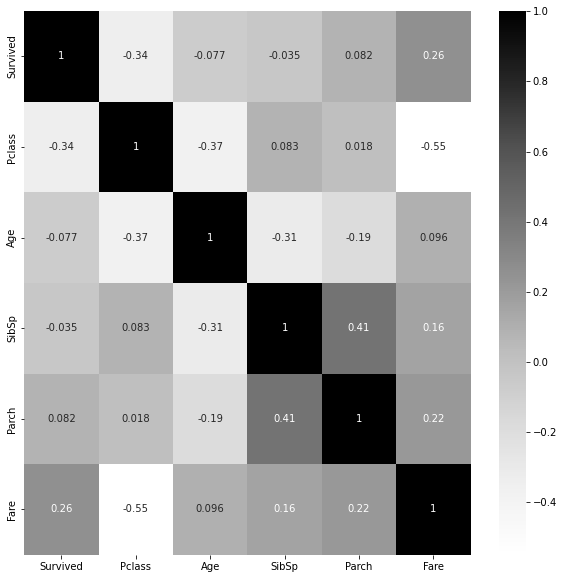

Survived    1.000000
Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

In [16]:
#Select best 3 attributes for training and testing your model. [2 points]
plt.figure(figsize=(10,10))
correaltion = ship_data.corr()
sns.heatmap(correaltion, annot=True, cmap=plt.cm.Greys)
plt.show()

ship_data.corr()['Survived']

In [17]:
#for finding K value
output_variable = abs(cor["Survived"])
#printing top 3 correlated features
output_variable = output_variable.sort_values(ascending=False)
output_variable = output_variable.iloc[:4]

print(output_variable.head())

Survived    1.000000
Pclass      0.338481
Fare        0.257307
Parch       0.081629
Name: Survived, dtype: float64


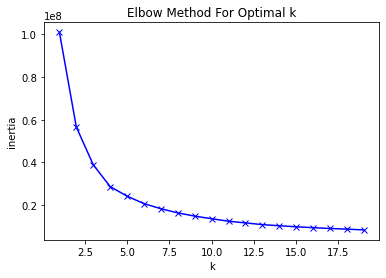

In [18]:
#Finding the best K using elbow method (Optimal K)

inertia = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k,)
    km = km.fit(encoded_set)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [35]:
#Split your dataset 75% for training, and 25% for testing the classifier. [2 points]
X = ship_data[['Pclass','Fare','Parch']]
y = ship_data['Survived']

W = ship_data.loc[:, ship_data.columns.isin(output_variable.keys())]
v = ship_data['Survived']

training_X,testing_X,training_y,testing_y = train_test_split(X,y,test_size=0.25,random_state=2022)
training_W,testing_W,training_v,testing_v = train_test_split(W,v,test_size=0.25,random_state=2022)

In [42]:
accuracy = []
for i in range(10,14):
 knn = KNeighborsClassifier(n_neighbors=i,metric="euclidean")
 knn.fit(training_X,training_y)
 predicted = knn.predict(testing_X)
 matrix = confusion_matrix(testing_y, predicted)
 report = classification_report(testing_y, predicted)
 print("Confusion Matrix for n_neighbors=",i,"\n")
 print(matrix)
 print("\nClassification Report for n_neighbors=",i,"\n")
 print(report)
 error_rate.append(np.mean(predicted != testing_y))

Confusion Matrix for n_neighbors= 10 

[[118  25]
 [ 47  33]]

Classification Report for n_neighbors= 10 

              precision    recall  f1-score   support

           0       0.72      0.83      0.77       143
           1       0.57      0.41      0.48        80

    accuracy                           0.68       223
   macro avg       0.64      0.62      0.62       223
weighted avg       0.66      0.68      0.66       223

Confusion Matrix for n_neighbors= 11 

[[113  30]
 [ 44  36]]

Classification Report for n_neighbors= 11 

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       143
           1       0.55      0.45      0.49        80

    accuracy                           0.67       223
   macro avg       0.63      0.62      0.62       223
weighted avg       0.66      0.67      0.66       223

Confusion Matrix for n_neighbors= 12 

[[121  22]
 [ 48  32]]

Classification Report for n_neighbors= 12 

              precision  

In [43]:
accuracy = []
for i in range(10,14):
 knn = KNeighborsClassifier(n_neighbors=i,metric="euclidean")
 knn.fit(training_W,training_v)
 predicted = knn.predict(testing_W)
 matrix = confusion_matrix(testing_v, predicted)
 report = classification_report(testing_v, predicted)
 print("Confusion Matrix for n_neighbors=",i,"\n")
 print(matrix)
 print("\nClassification Report for n_neighbors=",i,"\n")
 print(report)
 error_rate.append(np.mean(predicted != testing_v))

Confusion Matrix for n_neighbors= 10 

[[126  17]
 [ 13  67]]

Classification Report for n_neighbors= 10 

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       143
           1       0.80      0.84      0.82        80

    accuracy                           0.87       223
   macro avg       0.85      0.86      0.86       223
weighted avg       0.87      0.87      0.87       223

Confusion Matrix for n_neighbors= 11 

[[122  21]
 [  7  73]]

Classification Report for n_neighbors= 11 

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       143
           1       0.78      0.91      0.84        80

    accuracy                           0.87       223
   macro avg       0.86      0.88      0.87       223
weighted avg       0.89      0.87      0.88       223

Confusion Matrix for n_neighbors= 12 

[[126  17]
 [  9  71]]

Classification Report for n_neighbors= 12 

              precision  

The least/minimal error value =  0.3004484304932735 . 
The minimal error value is obtained at K = 7


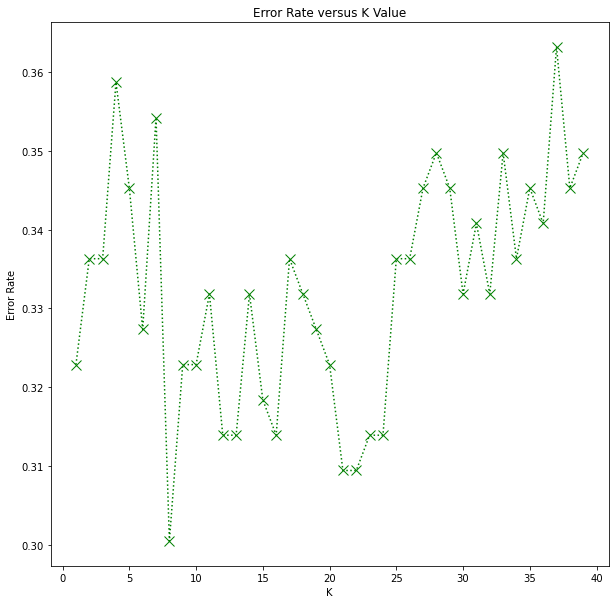

In [55]:
#Plot the Error rate vs. K-value.
rate_of_error = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(training_X,training_y)
  pred_i = knn.predict(testing_X)
  rate_of_error.append(np.mean(pred_i != testing_y))
plt.figure(figsize=(10,10))
plt.plot(range(1,40),rate_of_error,color='green', linestyle='dotted',
marker='x',markerfacecolor='red', markersize=10)
plt.title('Error Rate versus K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("The least/minimal error value = ",min(rate_of_error),".","\nThe minimal error value is obtained at K =",rate_of_error.index(min(rate_of_error)))